<a href="https://colab.research.google.com/github/Ali-Alameer/Deep-Learning/blob/main/week4_convolutional_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Convolutional Layers: These layers perform convolution operations on the input images to extract relevant features. The Conv2D layers use small square filters and a rectified linear unit (relu) activation function to learn and detect different patterns in the images.

Pooling Layer: The MaxPooling2D layer downsamples the feature maps obtained from the convolutional layers by selecting the maximum value within each pooling region. This helps reduce the spatial dimensions while retaining the most important features.

Flatten Layer: This layer transforms the multidimensional feature maps into a flat vector. It allows the subsequent fully connected layers to process the extracted features.

Dense Layers: These fully connected layers use the extracted features to classify the input images.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical

# Load the digits dataset
digits = load_digits()

# Split the data into training, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Reshape the data for CNN
X_train = X_train.reshape(-1, 8, 8, 1) / 16.0  # Normalize the pixel values to the range [0, 1] and reshape for CNN
print('X_train**\n', X_train.shape)
print('y_train**\n', y_train.shape)

X_val = X_val.reshape(-1, 8, 8, 1) / 16.0
X_test = X_test.reshape(-1, 8, 8, 1) / 16.0
print('Shapes: \n')
print(f'X_val\n{X_val.shape}')
print(f'X_test\n{X_test.shape}')

# Convert the target labels to categorical format
print('Before\n', y_train)
y_train = to_categorical(y_train)
print('to_cat\n', y_train.shape, y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

# Create a convolutional neural network (CNN)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(8, 8, 1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

X_train**
 (1077, 8, 8, 1)
y_train**
 (1077,)
Shapes: 

X_val
(360, 8, 8, 1)
X_test
(360, 8, 8, 1)
Before
 [2 6 3 ... 1 2 8]
to_cat
 (1077, 10) [[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
Epoch 1/10
34/34 [==============================] - 0s 5ms/step - loss: 1.4309 - accuracy: 0.6416 - val_loss: 0.5595 - val_accuracy: 0.8528
Epoch 2/10
34/34 [==============================] - 0s 3ms/step - loss: 0.3740 - accuracy: 0.8988 - val_loss: 0.2977 - val_accuracy: 0.9333
Epoch 3/10
34/34 [==============================] - 0s 3ms/step - loss: 0.2300 - accuracy: 0.9350 - val_loss: 0.1932 - val_accuracy: 0.9444
Epoch 4/10
34/34 [==============================] - 0s 2ms/step - loss: 0.1674 - accuracy: 0.9489 - val_loss: 0.1449 - val_accuracy: 0.9528
Epoch 5/10
34/34 [==============================] - 0s 2ms/step - loss: 0.1429 - accuracy: 0.9591 - val_loss: 0.1408 - val_accuracy: 0.9611


In [2]:
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score
# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_labels = y_pred.argmax(axis=1)
y_test_labels = y_test.argmax(axis=1)

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test_labels, y_pred_labels)
print("Confusion Matrix:")
print(confusion_mat)

# Calculate F1 score
f1 = f1_score(y_test_labels, y_pred_labels, average='weighted')
print("F1 Score:", f1)

# Calculate recall
recall = recall_score(y_test_labels, y_pred_labels, average='weighted')
print("Recall:", recall)

# Calculate precision
precision = precision_score(y_test_labels, y_pred_labels, average='weighted')
print("Precision:", precision)

12/12 [==============================] - 0s 1ms/step
Confusion Matrix:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 46  1  0  0  0]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  0  0 34  0  0]
 [ 0  1  0  0  0  1  0  0 28  0]
 [ 0  0  0  2  0  0  0  0  1 37]]
F1 Score: 0.977745312332419
Recall: 0.9777777777777777
Precision: 0.9782766439909297


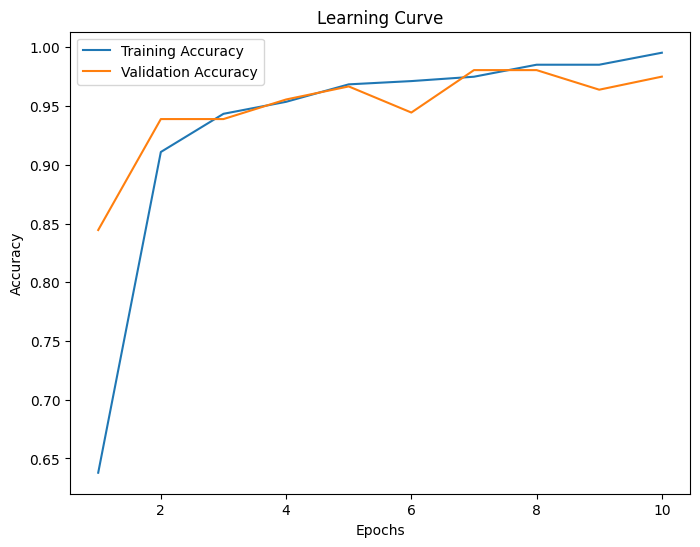

In [3]:
# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(history.history['accuracy']) + 1), history.history['accuracy'], label='Training Accuracy')
plt.plot(np.arange(1, len(history.history['accuracy']) + 1), history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Let's have a look at our input dataset

Number of training samples: 1077
Image size: 8 x 8
Image shape: (8, 8)


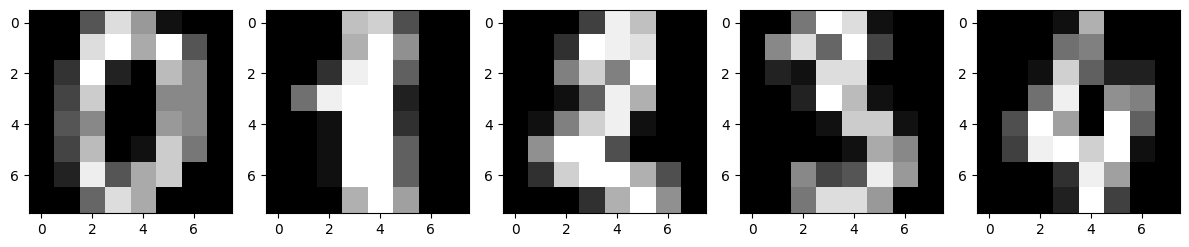

In [4]:
import matplotlib.pyplot as plt


# Get the number of samples and image dimensions
num_samples, img_height, img_width = X_train.shape[0], digits.images[0].shape[0], digits.images[0].shape[1]

# Visualize the first few training images
num_images_to_visualize = 5
fig, axes = plt.subplots(1, num_images_to_visualize, figsize=(12, 4))

for i in range(num_images_to_visualize):
    axes[i].imshow(digits.images[i], cmap='gray')

# Display image size and shape information
print("Number of training samples:", num_samples)
print("Image size: {} x {}".format(img_height, img_width))
print("Image shape:", digits.images[0].shape)

plt.tight_layout()
plt.show()


# Visualize the label distribution

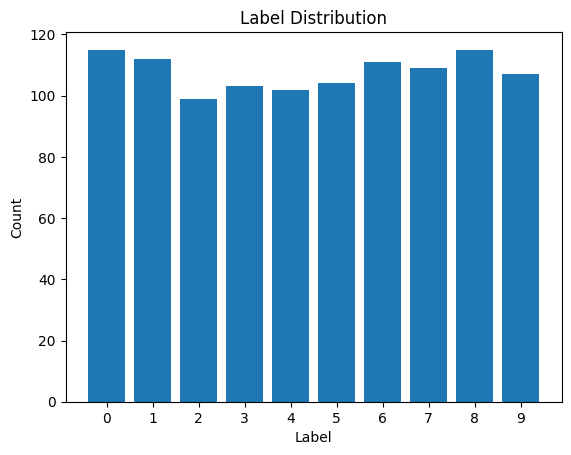

In [5]:
label_counts = np.sum(y_train, axis=0)

# Visualize the label distribution
labels = range(10)
plt.bar(labels, label_counts)
plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Label Distribution")
plt.xticks(labels)
plt.show()